# 目标
- 模糊/平滑图片来消除图片噪声
- OpenCV函数：cv2.blur(), cv2.GaussianBlur(), cv2.medianBlur(), cv2.bilateralFilter()

# 教程
## 滤波与模糊
推荐大家先阅读：番外篇：卷积基础(图片边框)，有助于理解卷积和滤波的概念。

关于滤波和模糊，很多人分不清，我来给大家理理（虽说如此，我后面也会混着用,,ԾㅂԾ,,）：

它们都属于卷积，不同滤波方法之间只是卷积核不同（对线性滤波而言）
低通滤波器是模糊，高通滤波器是锐化
低通滤波器就是允许低频信号通过，在图像中边缘和噪点都相当于高频部分，所以低通滤波器用于去除噪点、平滑和模糊图像。高通滤波器则反之，用来增强图像边缘，进行锐化处理。

常见噪声有椒盐噪声和高斯噪声，椒盐噪声可以理解为斑点，随机出现在图像中的黑点或白点；高斯噪声可以理解为拍摄图片时由于光照等原因造成的噪声。

均值滤波
均值滤波是一种最简单的滤波处理，它取的是卷积核区域内元素的均值，用cv2.blur()实现，如3×3的卷积核：
```
             ⎡ 1 1 1 ⎤
kernel = 1/9 ⎢ 1 1 1 ⎥
             ⎣ 1 1 1 ⎦
```                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [1]:
import cv2

img = cv2.imread('lena.jpg')
blur = cv2.blur(img, (3,3)) # 均值模糊
cv2.imshow('blur', blur)
cv2.waitKey(0)

-1

所有的滤波函数都有一个可选参数borderType，这个参数就是番外篇：卷积基础(图片边框)中所说的边框填充方式

## 方框滤波
方框滤波跟均值滤波很像，如3×3的滤波核如下：
```
      ⎡ 1 1 1 ⎤
k = a ⎢ 1 1 1 ⎥
      ⎣ 1 1 1 ⎦
```
用cv2.boxFilter()函数实现，当可选参数normalize为True的时候，方框滤波就是均值滤波，上式中的a就等于1/9；normalize为False的时候，a=1，相当于求区域内的像素和。

In [2]:
# 前面的均值滤波也可以用方框滤波实现：normalize=True
blur = cv2.boxFilter(img, -1, (3, 3), normalize=True)
cv2.imshow('blur', blur)
cv2.waitKey(0)

-1

## 高斯滤波
前面两种滤波方式，卷积核内的每个值都一样，也就是说图像区域中每个像素的权重也就一样。高斯滤波的卷积核权重并不相同：中间像素点权重最高，越远离中心的像素权重越小，来，数学时间( ╯□╰ )，还记得标准正态分布的曲线吗？
![](http://blog.codec.wang/cv2_gaussian_kernel_function_theory.jpg)
显然这种处理元素间权值的方式更加合理一些。图像是2维的，所以我们需要使用2维的高斯函数，比如OpenCV中默认的3×3的高斯卷积核（具体原理和卷积核生成方式请参考文末的番外小篇）：
```
    ⎡ 0.0625  0.125  0.0625 ⎤
k = ⎢ 0.125   0.25   0.125  ⎥
    ⎣ 0.0625  0.125  0.0625 ⎦
```
OpenCV中对应函数为cv2.GaussianBlur(src,ksize,sigmaX)：

(<matplotlib.axes._subplots.AxesSubplot at 0x1bba378af28>,
 <matplotlib.image.AxesImage at 0x1bba37f5c88>)

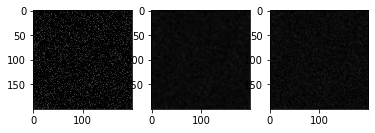

In [8]:
import matplotlib.pyplot as plt
img = cv2.imread('gaussian_noise.bmp')
# 均值滤波VS高斯滤波
blur = cv2.blur(img, (5,5))
gaussian = cv2.GaussianBlur(img, (5,5), 1)

img1 = img[:, :, ::-1]
blur1 = blur[:, :, ::-1]
gaussian1 = gaussian[:, :, ::-1]
# 或使用
# img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(img1)
plt.subplot(132),plt.imshow(blur1)
plt.subplot(133),plt.imshow(gaussian1)

参数3 σx值越大，模糊效果越明显。高斯滤波相比均值滤波效率要慢，但可以有效消除高斯噪声，能保留更多的图像细节，所以经常被称为最有用的滤波器。均值滤波与高斯滤波的对比结果如下（均值滤波丢失的细节更多）：
![](http://blog.codec.wang/cv2_gaussian_vs_average.jpg)

## 中值滤波
中值又叫中位数，是所有数排序后取中间的值。中值滤波就是用区域内的中值来代替本像素值，所以那种孤立的斑点，如0或255很容易消除掉，适用于去除椒盐噪声和斑点噪声。中值是一种非线性操作，效率相比前面几种线性滤波要慢。

比如下面这张斑点噪声图，用中值滤波显然更好：

(<matplotlib.axes._subplots.AxesSubplot at 0x1bba4ab3ef0>,
 <matplotlib.image.AxesImage at 0x1bba4b19ba8>)

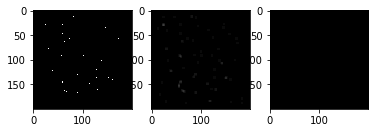

In [16]:
img = cv2.imread('salt_noise.bmp')
# 均值滤波vs中值滤波
blur = cv2.blur(img, (5, 5))  # 均值滤波
median = cv2.medianBlur(img, 5)  # 中值滤波

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur1 =cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
median1 = cv2.cvtColor(median, cv2.COLOR_BGR2RGB)
# 或使用
# img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(img1)
plt.subplot(132),plt.imshow(blur1)
plt.subplot(133),plt.imshow(median1)

![](http://blog.codec.wang/cv2_median_vs_average.jpg)

## 双边滤波
模糊操作基本都会损失掉图像细节信息，尤其前面介绍的线性滤波器，图像的边缘信息很难保留下来。然而，边缘（edge）信息是图像中很重要的一个特征，所以这才有了双边滤波。用cv2.bilateralFilter()函数实现：

(<matplotlib.axes._subplots.AxesSubplot at 0x1bba4b93320>,
 <matplotlib.image.AxesImage at 0x1bba4bff0b8>)

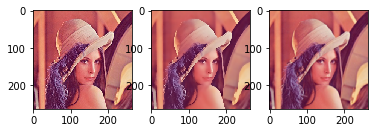

In [17]:
img = cv2.imread('lena.jpg')
# 双边滤波vs高斯滤波
gau = cv2.GaussianBlur(img, (5, 5), 0)# 高斯滤波
blur = cv2.bilateralFilter(img, 9, 75, 75) # 双边滤波

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blur1 =cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)
gau1 = cv2.cvtColor(gau, cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(img1)
plt.subplot(132),plt.imshow(blur1)
plt.subplot(133),plt.imshow(gau1)

可以看到，双边滤波明显保留了更多边缘信息。

# 番外小篇：高斯滤波卷积核

## 小结
- 在不知道用什么滤波器好的时候，优先高斯滤波cv2.GaussianBlur()，然后均值滤波cv2.blur()。
- 斑点和椒盐噪声优先使用中值滤波cv2.medianBlur()。
- 要去除噪点的同时尽可能保留更多的边缘信息，使用双边滤波cv2.bilateralFilter()。
- 线性滤波方式：均值滤波、方框滤波、高斯滤波（速度相对快）。
- 非线性滤波方式：中值滤波、双边滤波（速度相对慢）。